Number of training data= 1000
[[ 0.83159 -0.33906  0.     ]
 [ 0.87196  0.24418  0.     ]
 [ 1.01934  0.23241  0.     ]
 [ 1.09207  0.39539  0.     ]
 [ 1.2249   0.20577  0.     ]
 [ 0.73857  0.2535   0.     ]
 [ 1.31868  0.14831  0.     ]
 [ 0.97316  0.27317  0.     ]
 [ 0.98258  0.42117  0.     ]
 [ 0.62744  0.31469  0.     ]]
loss = [[nan]]
[[-57.8495368 ]
 [ -1.05297676]
 [ -0.55931777]
 [ 21.36427031]
 [  7.6590246 ]
 [ -1.97217573]]


/Applications/miniconda3/envs/CE9010_2018/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


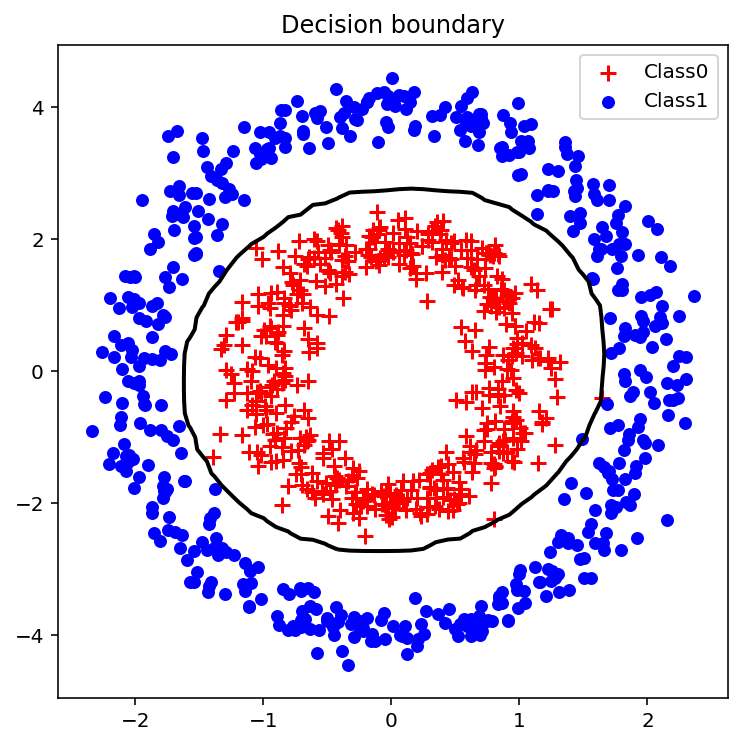

In [15]:
#Supervised classification

import numpy as np
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data = np.loadtxt('data/data.txt', delimiter=',')
n = data.shape[0] 
print('Number of training data=',n)
print(data[:10,:])
X = np.ones([n,6]) 
X[:,1:3] = data[:,0:2]
X[:,3] = data[:,0]**2
X[:,4] = data[:,1]**2
X[:,5] = data[:,0]*data[:,1]

def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 

def f_pred(X,w): 
    p = sigmoid(X.dot(w)) 
    return p

def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -1/n* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) ) 
    return loss

def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2/n* X.T.dot(y_pred-y) 
    return grad

logreg_sklearn = LogisticRegression(C=1e6)
logreg_sklearn.fit(X[:,1:6], data[:,2])

w_sklearn = np.zeros([6,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:6,0] = logreg_sklearn.coef_
loss_sklearn = loss_logreg(f_pred(X,w_sklearn),data[:,2][:,None])
print('loss =',loss_sklearn)
print(w_sklearn)

x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),6]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = xx1.reshape(-1)**2
X2[:,4] = xx2.reshape(-1)**2
X2[:,5] = xx1.reshape(-1)*xx2.reshape(-1)
p = f_pred(X2,w_sklearn)
p = p.reshape(xx1.shape)

plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary')
plt.show()